# Webscrapping of washingmachine data from a Flipkart

## 1. Importing relevant libraries

In [3]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

## 2.Extracting the unstructured data

In [4]:
title=[]
rating=[]
Review_rating=[]
price=[]
speed=[]
warranty=[]
weight=[]
offer=[]
actualprice=[]

for i in range(1,21):
    url=f"https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=813d8080-7f76-45aa-9f3d-44e9ba56dc78&as-searchtext=was&page={i}"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)

#Title 
    
    for i in soup.find_all("div",class_="tUxRFH"):
        t=i.find("div",class_="KzDlHZ")
        if t:
            title.append(t.text)
        else:
            title.append(np.nan)

# Weight
        text=i.get_text()
        wt=re.findall(r"\d+(?:\.\d+)?\s?kg",text.lower())
        if wt:
            weight.append(wt[0])
        else:
            weight.append(np.nan)
#rating    
    
        r=i.find("div",class_="XQDdHH")
        if r:
            rating.append(r.text)
        else:
            rating.append(np.nan)

#rating and review
        r_r=i.find("span",class_="Wphh3N")
        if r_r:
            Review_rating.append(r_r.text)
        else:
            Review_rating.append(np.nan)


#price
        p=i.find("div",class_="Nx9bqj _4b5DiR")
        if p:
            price.append(p.text)
        else:
            price.append(np.nan)

# Speed
        text=i.get_text()
        sp=re.findall(r"(\d+)\s?[Rr][Pp][Mm]",text)
        if sp:
            speed.append(sp[0])
        else:
            speed.append(np.nan)
        
 #Warranty
        
        warran=re.findall(r"(\d+)\s+Years?",text)
        if warran:
            warranty.append(warran[0])
        else:
            warranty.append(np.nan)
#offer

        off=i.find("div",class_="UkUFwK")
        if off:
            offer.append(off.text)
        else:
            offer.append(np.nan)
#Actual Price

        a_p=i.find("div",class_="yRaY8j ZYYwLA")
        if a_p:
            actualprice.append(a_p.text)
        else:
            actualprice.append(np.nan)

## 3. Finding the length of each columns

In [5]:
print(len(title))
print(len(rating))
print(len(Review_rating))
print(len(price))
print(len(speed))
print(len(warranty))
print(len(weight))
print(len(offer))
print(len(actualprice))

360
360
360
360
360
360
360
360
360


## 4. Converting data into pandas Dataframe

In [6]:
dic={"Title":title,"Weight":weight,"Rating":rating,"Review and Rating":Review_rating,"Speed":speed,"Warranty":warranty,"Actual Price":actualprice,"Offer":offer,"Final Price After Discount":price}

In [7]:
WashineMachine_df=pd.DataFrame(dic)

In [8]:
WashineMachine_df.head()

Title  Weight Rating  \
0  Haier 9 kg Oxyi Dry Technology, 1300 RPM, Spra...    9 kg    4.3   
1  Godrej 7 kg 5 Star, Zero Pressure Technology F...    7 kg    4.2   
2  realme TechLife 7 kg 5 Star rating Semi Automa...    7 kg    4.2   
3  realme TechLife 8.5 kg 5 Star rating Semi Auto...  8.5 kg    4.2   
4  realme TechLife 7.5 kg 5 Star Rating Semi Auto...  7.5 kg    4.2   

                Review and Rating Speed Warranty Actual Price    Offer  \
0     3,122 Ratings & 181 Reviews  1300        3      ₹19,000  36% off   
1     7,087 Ratings & 522 Reviews   720        2      ₹27,000  47% off   
2  79,640 Ratings & 7,217 Reviews  1400        2      ₹12,490  37% off   
3  79,640 Ratings & 7,217 Reviews  1400        2      ₹18,990  47% off   
4  79,640 Ratings & 7,217 Reviews  1400        2      ₹13,990  40% off   

  Final Price After Discount  
0                    ₹11,990  
1                    ₹14,100  
2                     ₹7,790  
3                     ₹9,890  
4                     ₹8,290

## 5. Exporting and saving the data into csv format 

In [25]:
WashineMachine_df.to_csv('washing_df.csv', index=False)

## 6. reading the exported data

In [97]:
df=pd.read_csv("washing_df.csv")

In [98]:
df.head()

Title  Weight  Rating  \
0  Haier 9 kg Oxyi Dry Technology, 1300 RPM, Spra...    9 kg     4.3   
1  Godrej 7 kg 5 Star, Zero Pressure Technology F...    7 kg     4.2   
2  realme TechLife 7 kg 5 Star rating Semi Automa...    7 kg     4.2   
3  realme TechLife 8.5 kg 5 Star rating Semi Auto...  8.5 kg     4.2   
4  realme TechLife 7.5 kg 5 Star Rating Semi Auto...  7.5 kg     4.2   

                Review and Rating  Speed  Warranty Actual Price    Offer  \
0     3,122 Ratings & 181 Reviews   1300       3.0      ₹19,000  36% off   
1     7,087 Ratings & 522 Reviews    720       2.0      ₹27,000  47% off   
2  79,640 Ratings & 7,217 Reviews   1400       2.0      ₹12,490  37% off   
3  79,640 Ratings & 7,217 Reviews   1400       2.0      ₹18,990  47% off   
4  79,640 Ratings & 7,217 Reviews   1400       2.0      ₹13,990  40% off   

  Final Price After Discount  
0                    ₹11,990  
1                    ₹14,100  
2                     ₹7,790  
3                     ₹9,890  
4                     ₹8,290

## 7.How many features(Columns) do you have?
## How many observations(rows) do you have?
## What is the data type of each feature(Columns)?
## How many missing values are there?

In [28]:
df.shape

(360, 9)

In [16]:
df.shape[1]

9

In [17]:
df.shape[0]

360

In [99]:
df.dtypes

Title                          object
Weight                         object
Rating                        float64
Review and Rating              object
Speed                           int64
Warranty                      float64
Actual Price                   object
Offer                          object
Final Price After Discount     object
dtype: object

# Cleaning the Dataset
## Converting the datatypes

In [100]:
df['Weight'] = df['Weight'].str.replace(' kg', '', regex=False).astype(float)

In [101]:
price_columns = ['Actual Price','Final Price After Discount']
for col in price_columns:
    df[col] = df[col].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # safely convert to float

In [102]:
df.dtypes

Title                          object
Weight                        float64
Rating                        float64
Review and Rating              object
Speed                           int64
Warranty                      float64
Actual Price                  float64
Offer                          object
Final Price After Discount    float64
dtype: object

In [103]:
df.isnull().sum()

Title                          0
Weight                         0
Rating                         9
Review and Rating              9
Speed                          0
Warranty                      28
Actual Price                   3
Offer                          5
Final Price After Discount     2
dtype: int64

## 8. Filling the missing values

In [105]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Review and Rating']=df['Review and Rating'].fillna('Unknown')
df['Warranty']=df['Warranty'].fillna(df['Warranty'].median())
df['Actual Price']=df['Actual Price'].fillna(df['Actual Price'].median())
df['Offer']=df['Offer'].fillna('Unknown')
df['Final Price After Discount']=df['Final Price After Discount'].fillna(df['Final Price After Discount'].median())

In [106]:
df.isnull().sum()

Title                         0
Weight                        0
Rating                        0
Review and Rating             0
Speed                         0
Warranty                      0
Actual Price                  0
Offer                         0
Final Price After Discount    0
dtype: int64

## Data Cleaning Summary

- Weight values were successfully extracted and converted from text format ("7 kg") to numeric.

- Price columns (Actual Price and Final Price After Discount) were cleaned by removing currency symbols and formatting issues.

- Missing or inconsistent values were handled to ensure reliable analysis.



## 9. Identifying outliers in numerical columns

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

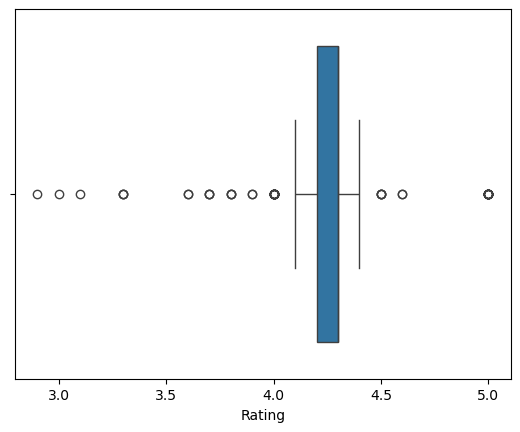

In [108]:
sns.boxplot(x=df['Rating'])
plt.show()

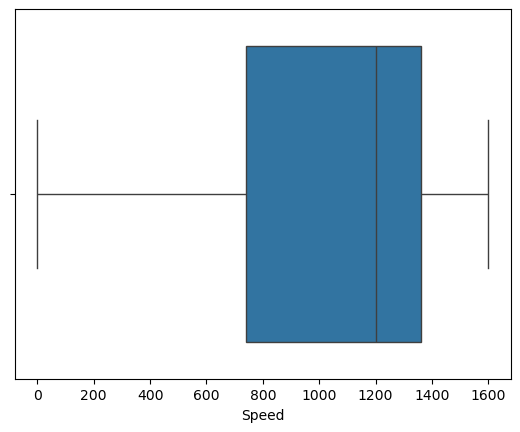

In [109]:
sns.boxplot(x=df['Speed'])
plt.show()

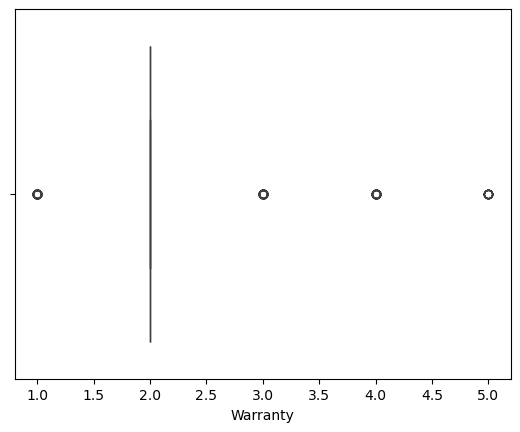

In [110]:
sns.boxplot(x=df['Warranty'])
plt.show()

## 10. Treating outliers

In [111]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

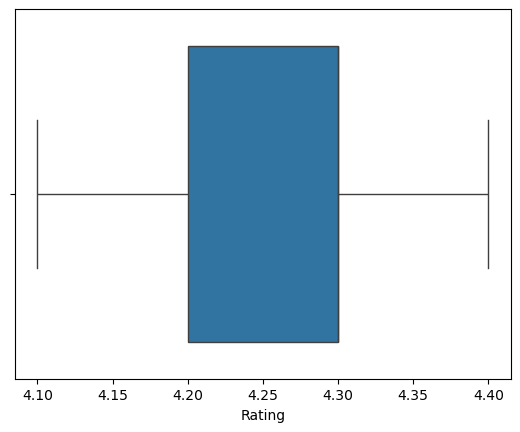

In [112]:
sns.boxplot(x=df['Rating'])
plt.show()

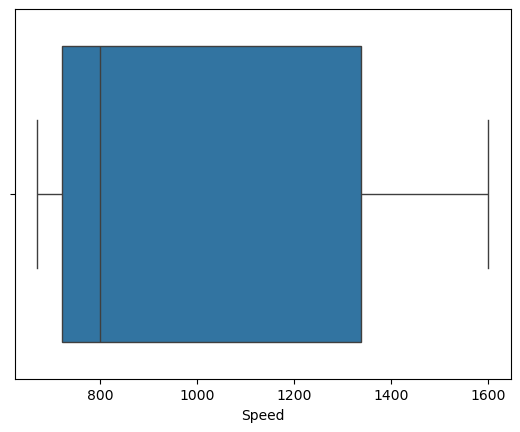

In [113]:
sns.boxplot(x=df['Speed'])
plt.show()

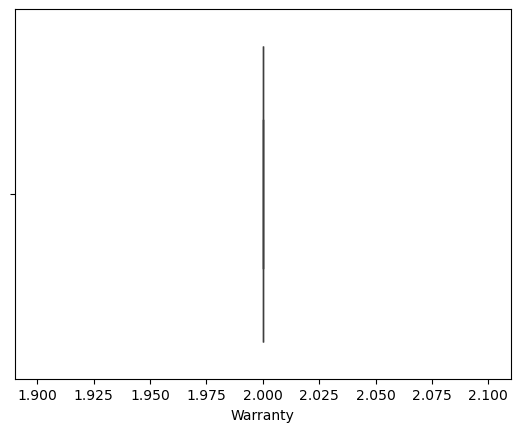

In [114]:
sns.boxplot(x=df['Warranty'])
plt.show()

## Data Analysis and Visualization (EDA)

## Univariate Analysis

In [115]:
df.head()

Title  Weight  Rating  \
1  Godrej 7 kg 5 Star, Zero Pressure Technology F...     7.0     4.2   
2  realme TechLife 7 kg 5 Star rating Semi Automa...     7.0     4.2   
3  realme TechLife 8.5 kg 5 Star rating Semi Auto...     8.5     4.2   
4  realme TechLife 7.5 kg 5 Star Rating Semi Auto...     7.5     4.2   
5  realme TechLife 7.5 kg 5 Star Rating Fabric Sa...     7.5     4.1   

                Review and Rating  Speed  Warranty  Actual Price    Offer  \
1     7,087 Ratings & 522 Reviews    720       2.0       27000.0  47% off   
2  79,640 Ratings & 7,217 Reviews   1400       2.0       12490.0  37% off   
3  79,640 Ratings & 7,217 Reviews   1400       2.0       18990.0  47% off   
4  79,640 Ratings & 7,217 Reviews   1400       2.0       13990.0  40% off   
5  26,801 Ratings & 2,551 Reviews    700       2.0       19990.0  40% off   

   Final Price After Discount  
1                     14100.0  
2                      7790.0  
3                      9890.0  
4                      8290.0  
5                     11990.0

In [116]:
continuous_cols = ['Weight', 'Rating', 'Speed', 'Warranty', 'Actual Price', 'Final Price After Discount']

In [119]:
summary_stats = df[continuous_cols].describe().T

In [120]:
summary_stats

count          mean          std      min  \
Weight                      158.0      7.665823     1.222911      6.0   
Rating                      158.0      4.255063     0.096134      4.1   
Speed                       158.0    959.291139   302.709385    670.0   
Warranty                    158.0      2.000000     0.000000      2.0   
Actual Price                158.0  22377.626582  5716.133481  11990.0   
Final Price After Discount  158.0  14327.291139  3230.640193   6790.0   

                                 25%      50%      75%      max  
Weight                          7.00      7.0      8.0     12.0  
Rating                          4.20      4.3      4.3      4.4  
Speed                         720.00    800.0   1337.5   1600.0  
Warranty                        2.00      2.0      2.0      2.0  
Actual Price                17900.00  21990.0  27000.0  35999.0  
Final Price After Discount  12517.25  14100.0  16990.0  23383.0

In [121]:
summary_stats['mode'] = df[continuous_cols].mode().iloc[0]

In [122]:
summary_stats

count          mean          std      min  \
Weight                      158.0      7.665823     1.222911      6.0   
Rating                      158.0      4.255063     0.096134      4.1   
Speed                       158.0    959.291139   302.709385    670.0   
Warranty                    158.0      2.000000     0.000000      2.0   
Actual Price                158.0  22377.626582  5716.133481  11990.0   
Final Price After Discount  158.0  14327.291139  3230.640193   6790.0   

                                 25%      50%      75%      max     mode  
Weight                          7.00      7.0      8.0     12.0      7.0  
Rating                          4.20      4.3      4.3      4.4      4.3  
Speed                         720.00    800.0   1337.5   1600.0    720.0  
Warranty                        2.00      2.0      2.0      2.0      2.0  
Actual Price                17900.00  21990.0  27000.0  35999.0  27000.0  
Final Price After Discount  12517.25  14100.0  16990.0  23383.0  16990.0

In [123]:
summary_stats = summary_stats[['mean', '50%', 'mode', 'std', 'min', 'max', '25%', '75%']]
print(summary_stats)

                                    mean      50%     mode          std  \
Weight                          7.665823      7.0      7.0     1.222911   
Rating                          4.255063      4.3      4.3     0.096134   
Speed                         959.291139    800.0    720.0   302.709385   
Warranty                        2.000000      2.0      2.0     0.000000   
Actual Price                22377.626582  21990.0  27000.0  5716.133481   
Final Price After Discount  14327.291139  14100.0  16990.0  3230.640193   

                                min      max       25%      75%  
Weight                          6.0     12.0      7.00      8.0  
Rating                          4.1      4.4      4.20      4.3  
Speed                         670.0   1600.0    720.00   1337.5  
Warranty                        2.0      2.0      2.00      2.0  
Actual Price                11990.0  35999.0  17900.00  27000.0  
Final Price After Discount   6790.0  23383.0  12517.25  16990.0  


## Box Plot Visualization

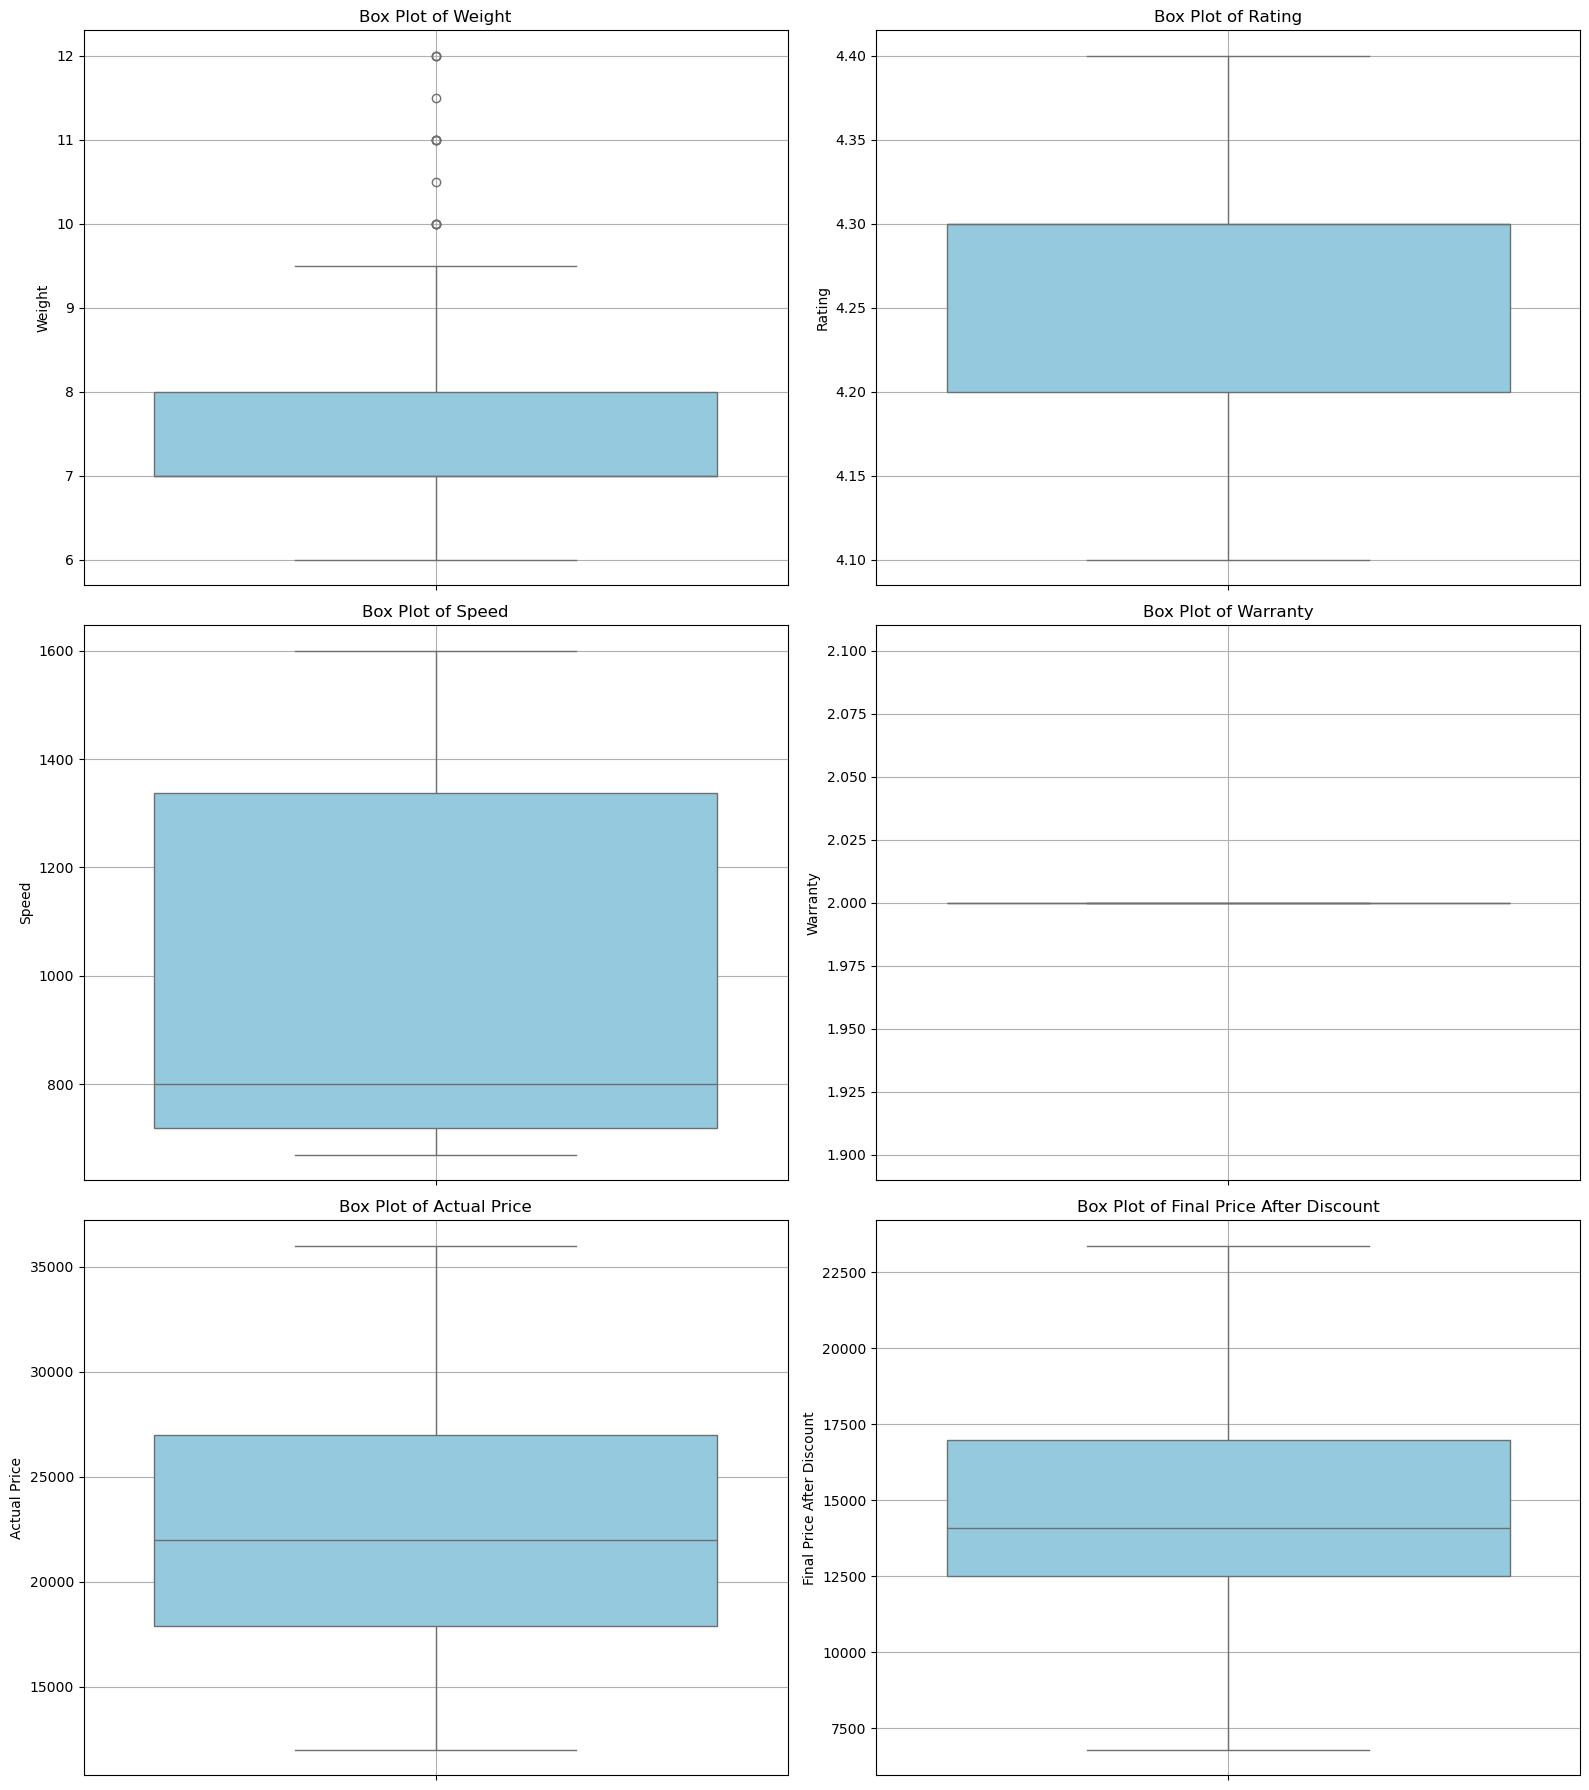

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up box plots for all continuous variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


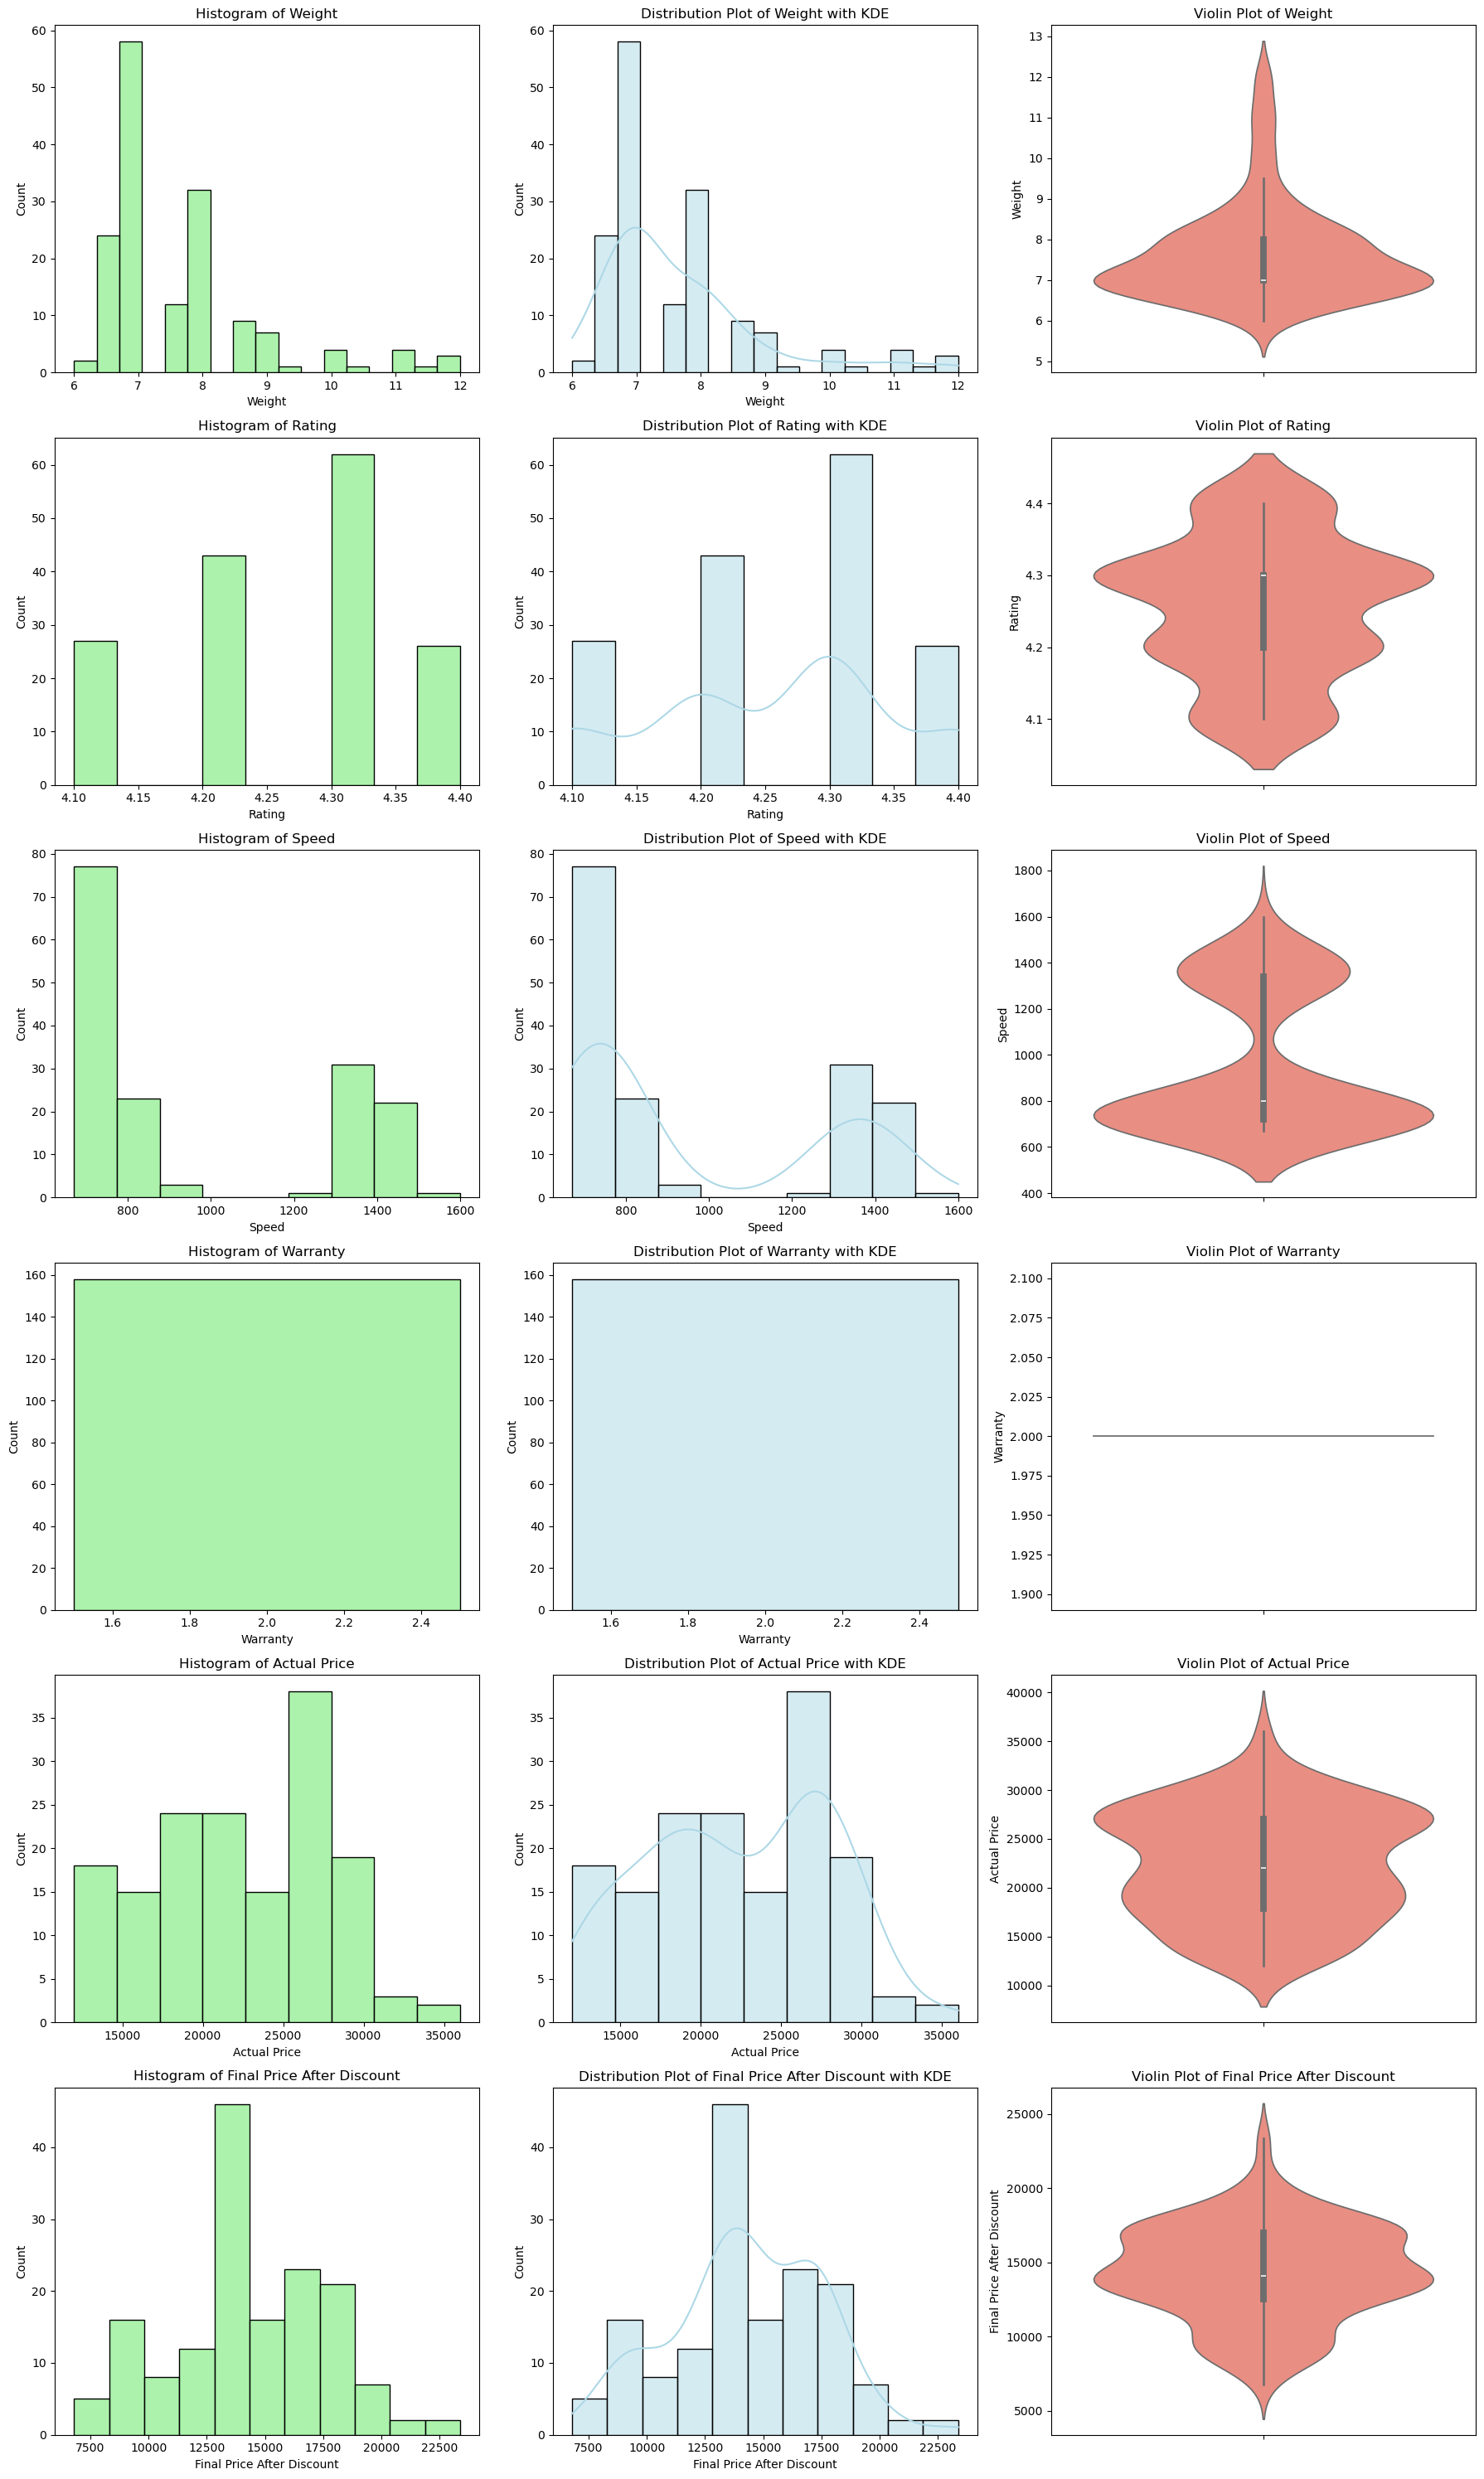

In [125]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    # Histogram
    sns.histplot(df[col].dropna(), kde=False, ax=axes[i*3], color='lightgreen')
    axes[i*3].set_title(f'Histogram of {col}')
    
    # Distribution Plot with KDE
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i*3+1], color='lightblue')
    axes[i*3+1].set_title(f'Distribution Plot of {col} with KDE')
    
    # Violin Plot
    sns.violinplot(y=df[col], ax=axes[i*3+2], color='salmon')
    axes[i*3+2].set_title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()

## For Continuous Variables:
- Prices (Actual & Discounted) show a wide range with significant variation—indicative of different brands and features.

- Ratings are skewed towards the higher end, implying generally positive customer feedback.

- Weight is concentrated between 6–8 kg, showing this as a common size for most washing machines.

- Speed and Warranty had varied distributions, possibly showing different market segments (basic vs premium).

## Frequency and Percentage for Categorical Variables

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns
categorical_cols = ['Title', 'Review and Rating', 'Offer']

# Calculate frequency and percentage
categorical_summary = {}
for col in categorical_cols:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100
    categorical_summary[col] = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    print(f"\nSummary for {col}:\n", categorical_summary[col])

# Optional: convert to CSV
# for col, summary in categorical_summary.items():
#     summary.to_csv(f'{col}_summary.csv')



Summary for Title:
                                                     Count  Percentage
Title                                                                
Godrej 7 kg 5 Star, Zero Pressure Technology Fi...     15        9.49
Haier 8 kg Balance Clean Pulsator, Custom Wash ...     13        8.23
Godrej 6.5 kg 5 Star With I-Wash Technology Was...     13        8.23
LG 7 kg 5 Star, Smart Inverter Technology, Turb...     13        8.23
Haier 7 kg Balance Clean Pulsator, Custom Wash ...      5        3.16
...                                                   ...         ...
Haier 8 kg Powerful Storm Pulsator, Custom Wash...      1        0.63
Godrej 7.5 kg 5 Star, Zero Pressure Technology ...      1        0.63
Godrej 7.5 kg 5 Star With Rain Shower Spin Wash...      1        0.63
MarQ by Flipkart 10 kg Semi Automatic Top Load ...      1        0.63
Godrej 7.5 kg Semi Automatic Top Load Washing M...      1        0.63

[90 rows x 2 columns]

Summary for Review and Rating:
              

## Visualizations for Categorical Variables

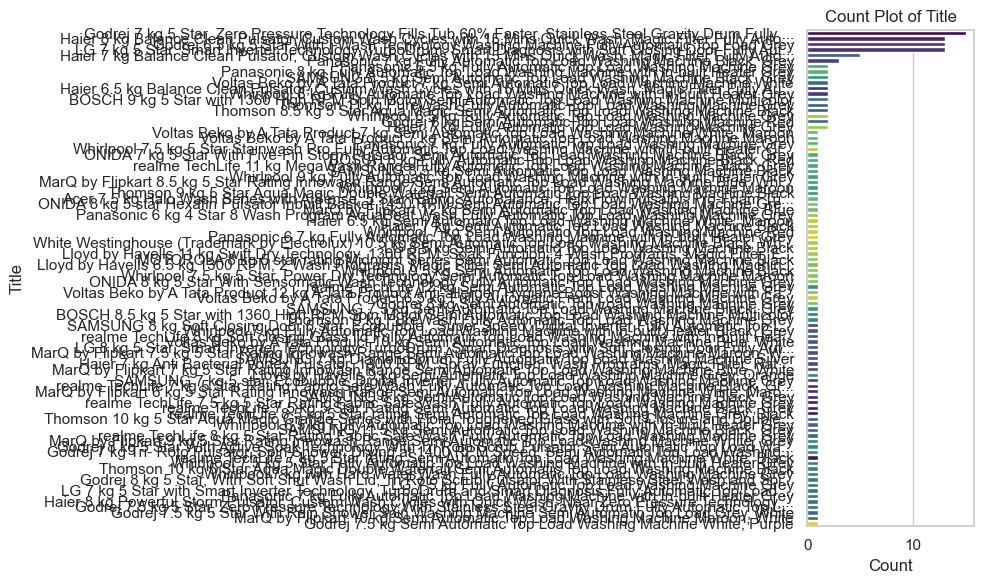

C:\Users\Jincy Denny\AppData\Local\Temp\ipykernel_16120\814591636.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


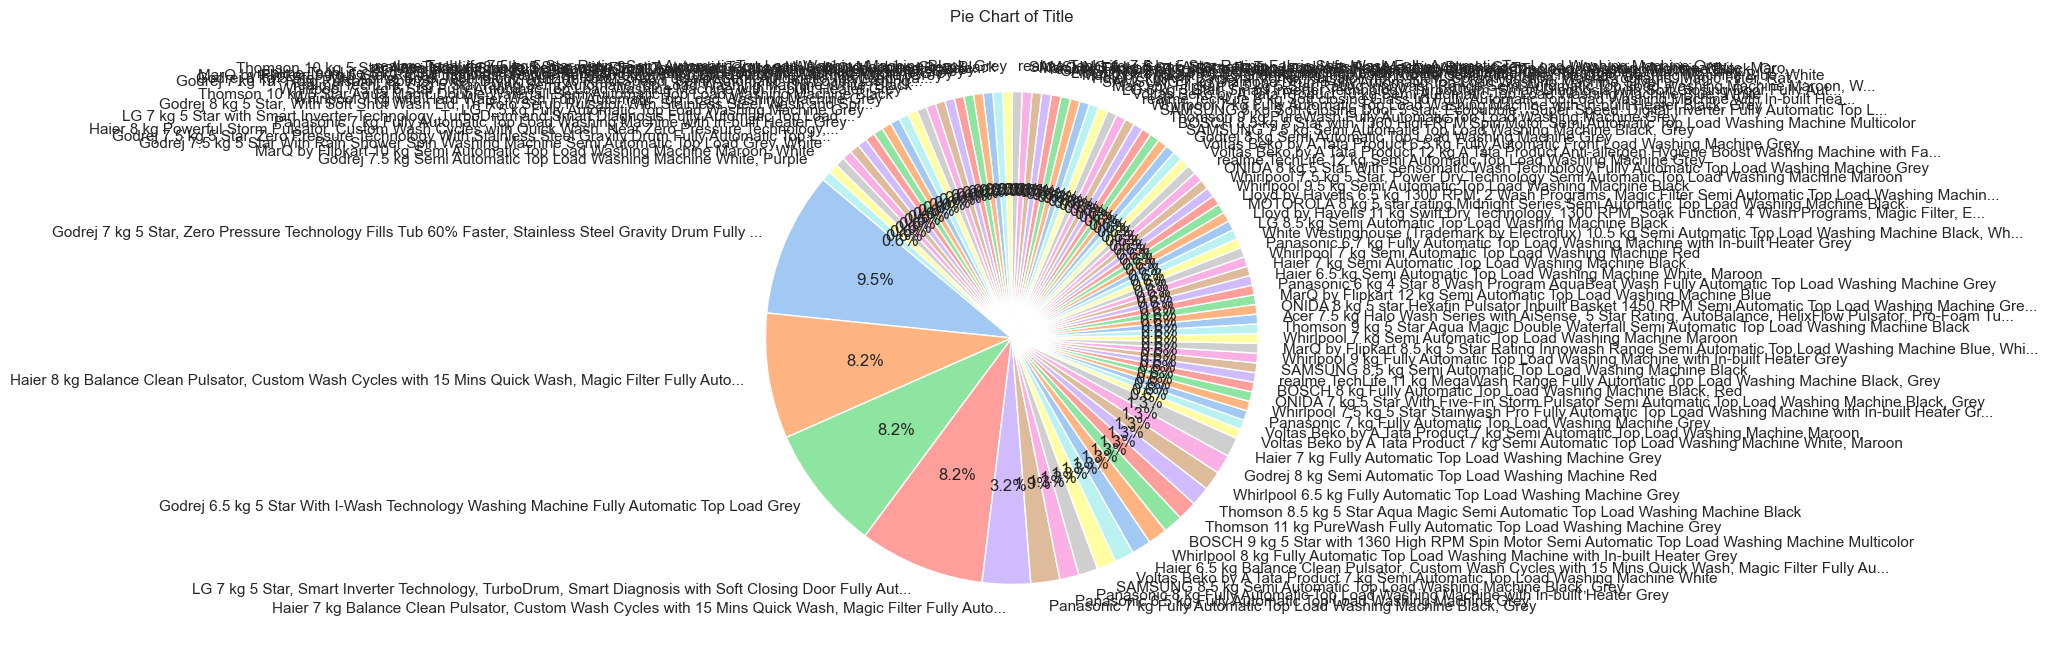

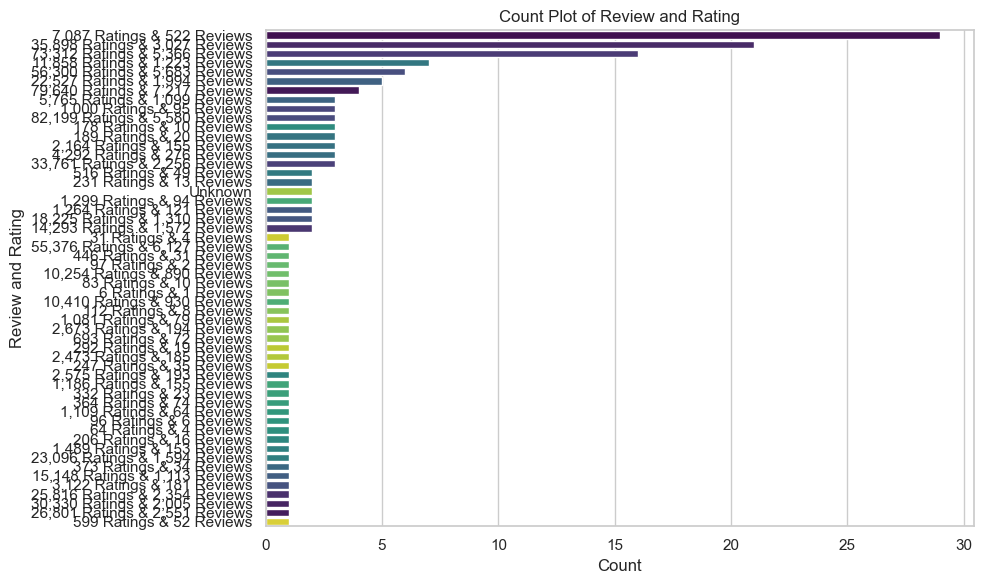

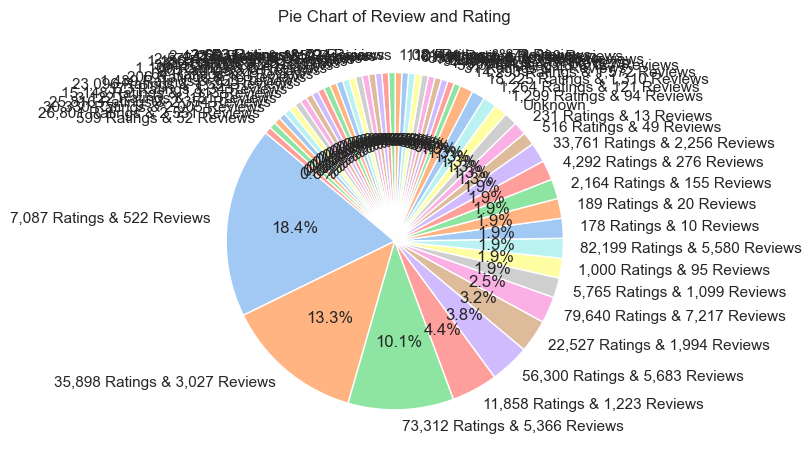

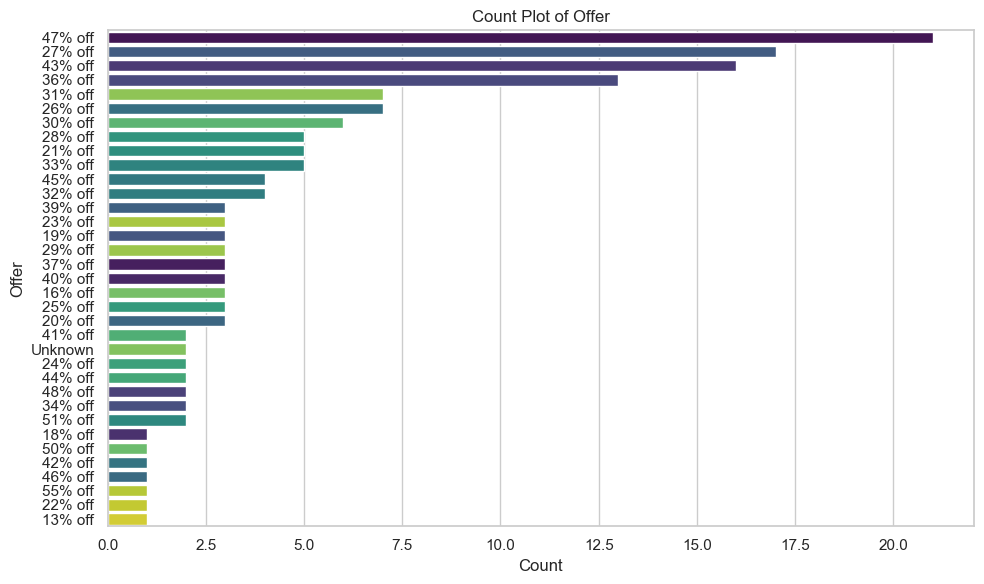

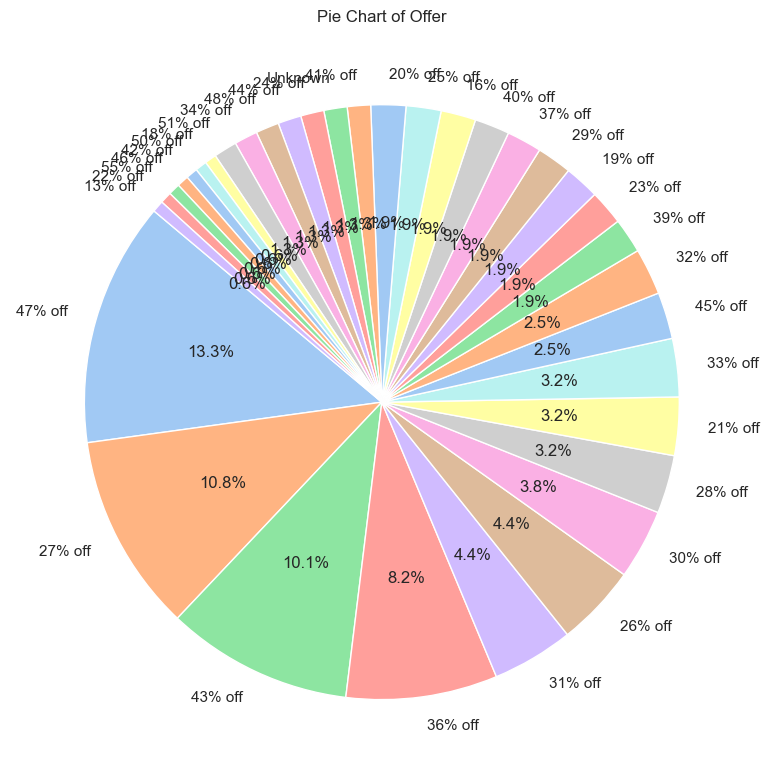

In [128]:
# Set plot style
sns.set(style="whitegrid")

# Create plots
for col in categorical_cols:
    # Count Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        hue=col,  # Explicitly use 'hue'
        palette="viridis",
        legend=False  # Optional, hides redundant legend
    )
    plt.title(f'Count Plot of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    # Pie Chart (optional)
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel")
    )
    plt.ylabel('')
    plt.title(f'Pie Chart of {col}')
    plt.tight_layout()
    plt.show()



## For Categorical Variables:
- A few product titles dominate the dataset, indicating popular brands/models.

- The offer types vary, with some specific offers being more frequent.

- Review & Rating data reveals customers predominantly leave 4 and 5-star ratings, indicating satisfaction.

## Bivariate Analysis

## 1. Numerical vs Numerical

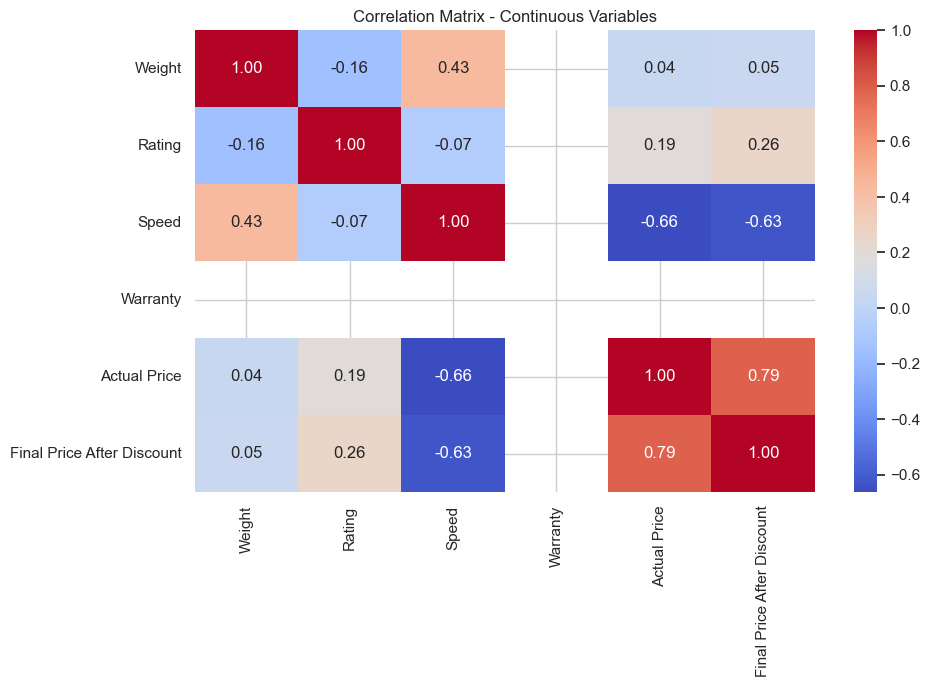

In [129]:
# Correlation matrix
correlation_matrix = df[['Weight', 'Rating', 'Speed', 'Warranty', 'Actual Price', 'Final Price After Discount']].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Continuous Variables')
plt.show()


## Numerical vs Numerical (Correlation):
- There is a strong correlation between Actual Price and Discounted Price, as expected.

- Weight and Price show mild positive correlation—heavier machines tend to be more expensive.

- Rating and Price have weak correlation—implying customer satisfaction is not solely driven by price.

## 2. Numerical vs Categorical

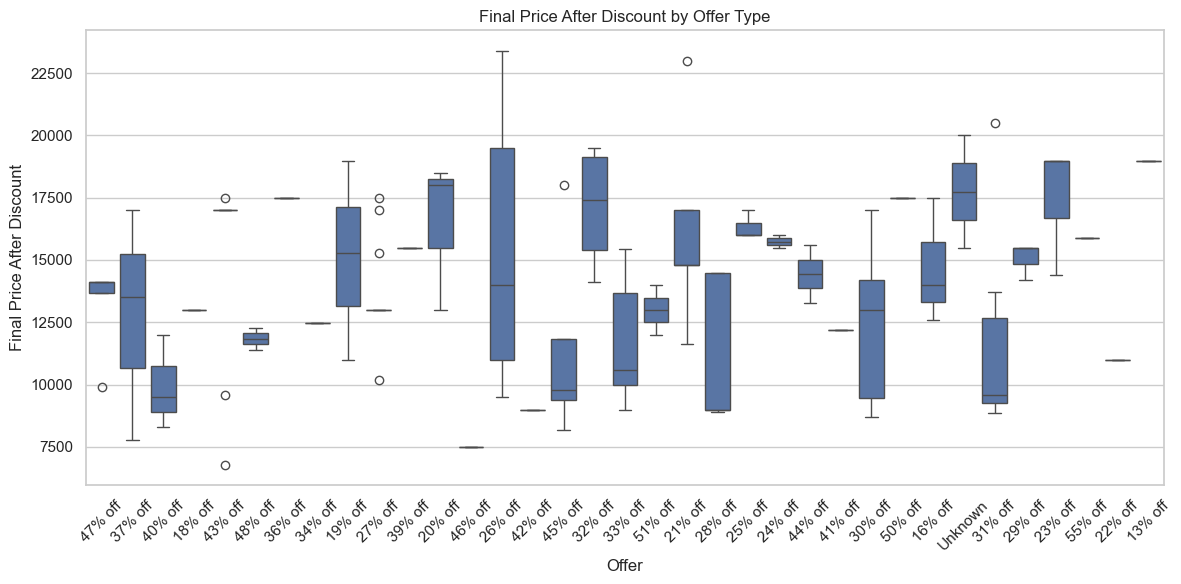

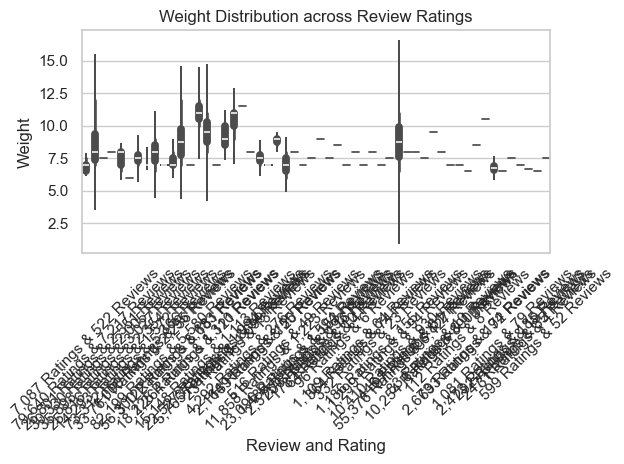

In [130]:
# Boxplot of Final Price by Offer
plt.figure(figsize=(12, 6))
sns.boxplot(x='Offer', y='Final Price After Discount', data=df)
plt.title('Final Price After Discount by Offer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot for Weight by Review
sns.violinplot(x='Review and Rating', y='Weight', data=df)
plt.title('Weight Distribution across Review Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Numerical vs Categorical:
- Boxplots of Price vs Offer indicate that some offers are associated with higher-end machines.

- Violin plots show that different rating categories do not significantly differ in weight distribution.

## 3. Categorical vs Categorical

C:\Users\Jincy Denny\AppData\Local\Temp\ipykernel_16120\1876419413.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


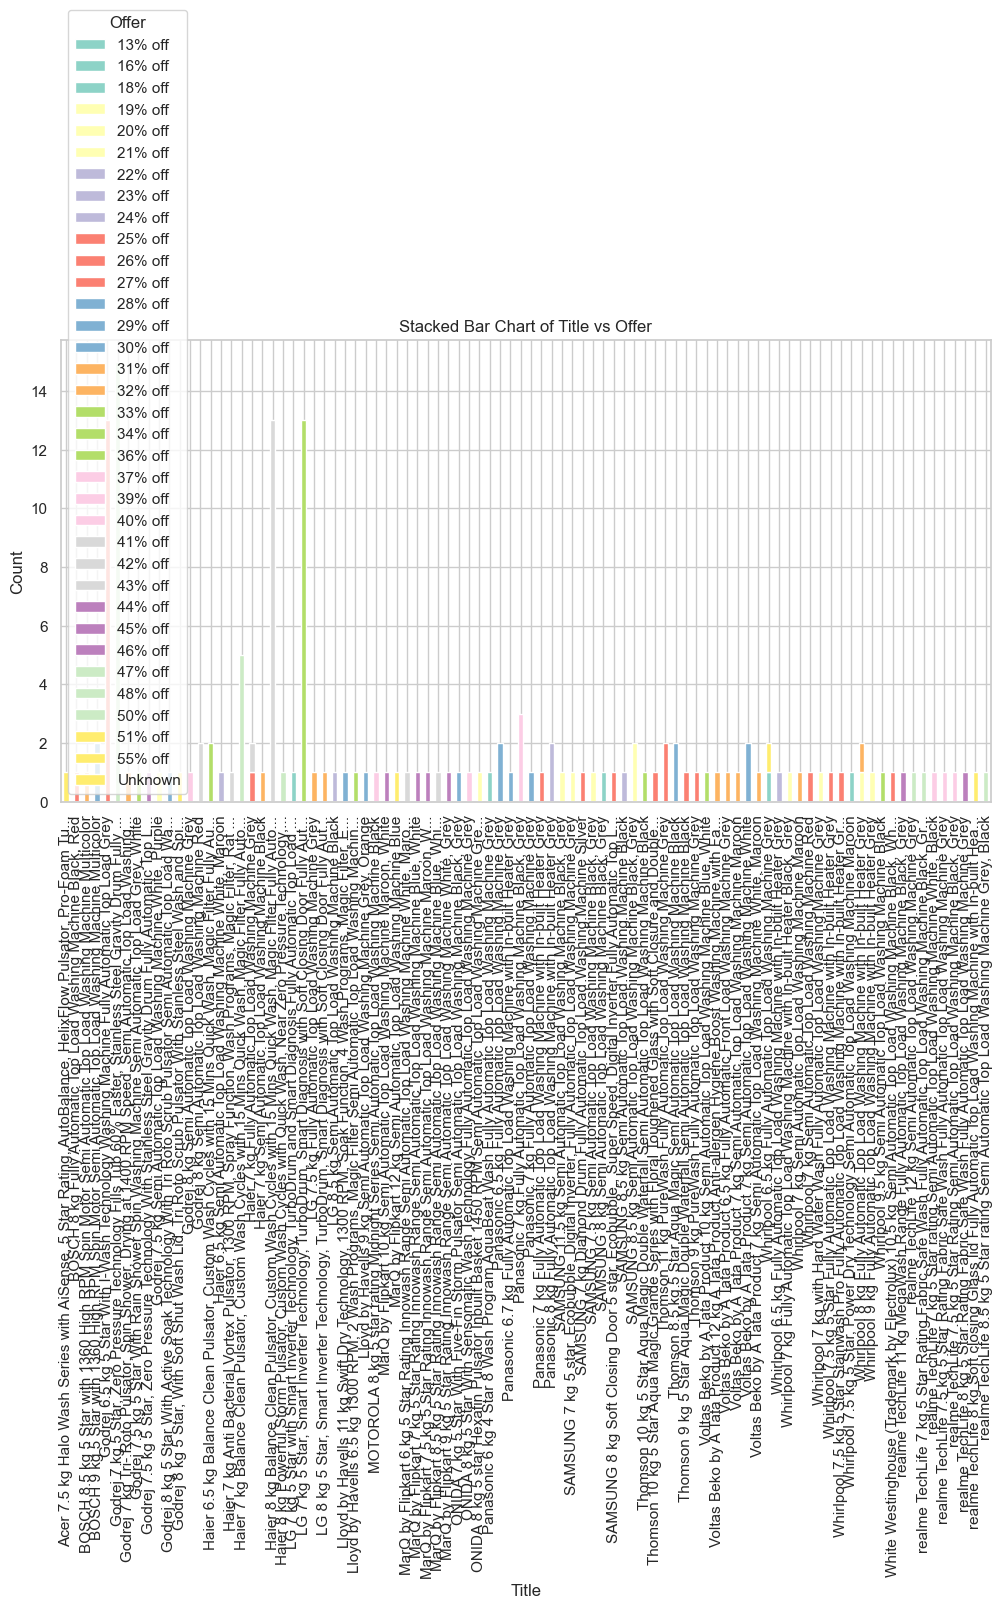

In [131]:
# Crosstab
cross_tab = pd.crosstab(df['Title'], df['Offer'])

# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Stacked Bar Chart of Title vs Offer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Categorical vs Categorical:
- Certain brands (Titles) are associated more with specific Offers—could help in marketing strategies.

## Multivariate Analysis

## 1.  Pairplot

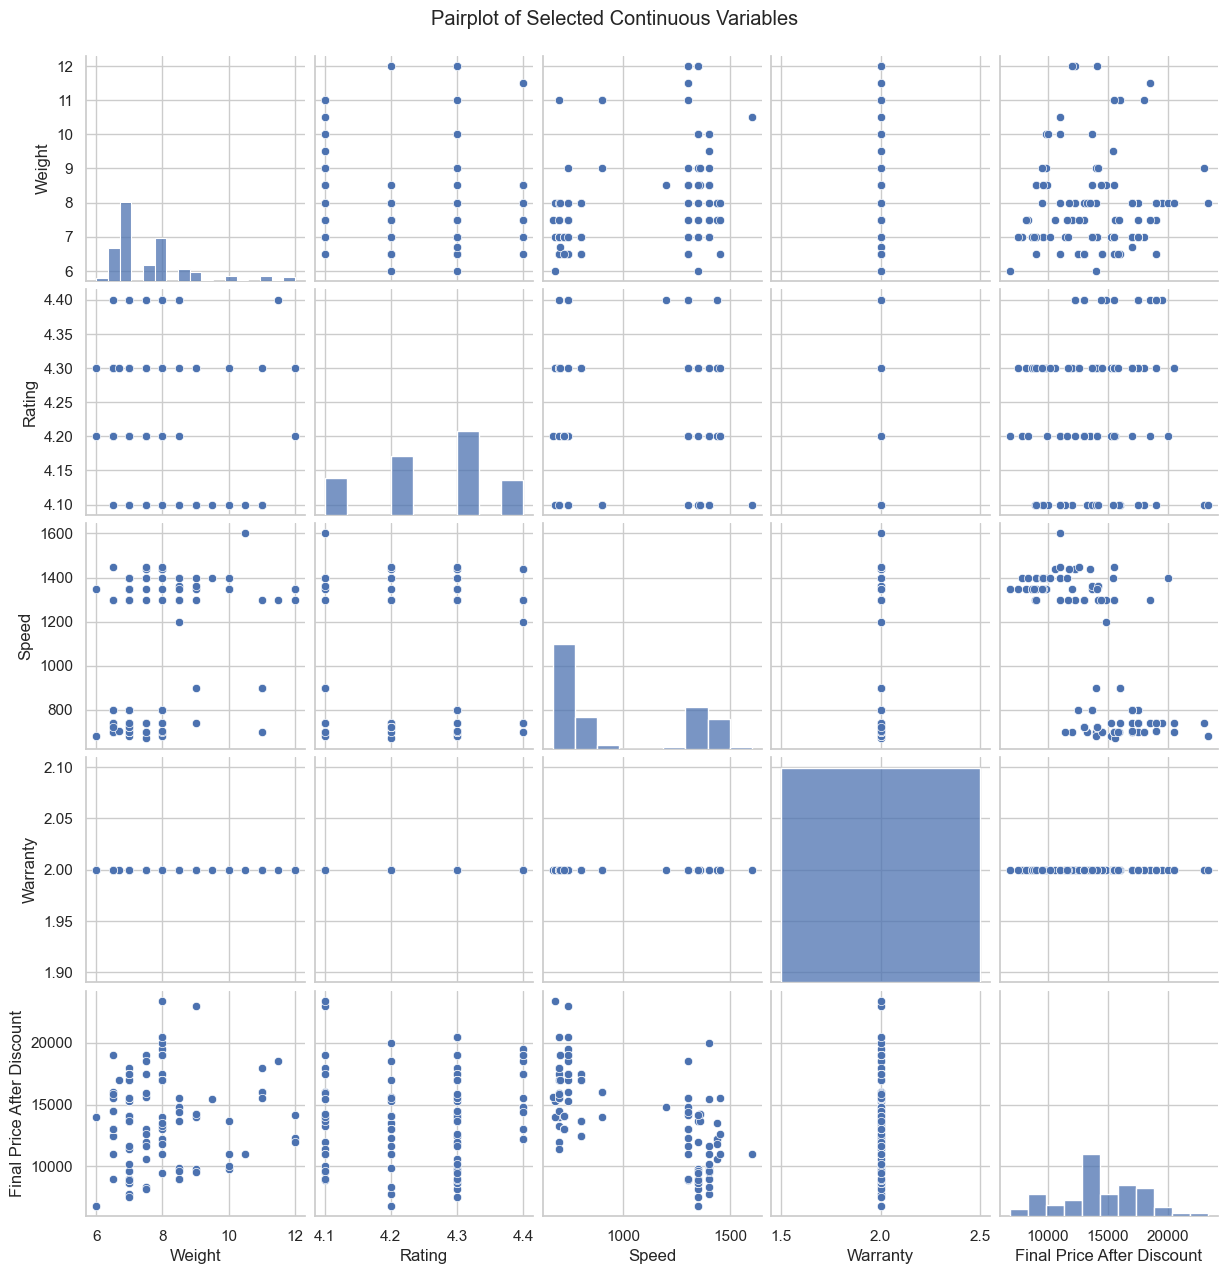

In [132]:
sns.pairplot(df[['Weight', 'Rating', 'Speed', 'Warranty', 'Final Price After Discount']])
plt.suptitle('Pairplot of Selected Continuous Variables', y=1.02)
plt.show()


## 2.Group-wise Aggregation

Review and Rating  1,000 Ratings & 95 Reviews  1,081 Ratings & 79 Reviews  \
Offer                                                                       
13% off                                   NaN                         NaN   
16% off                                   NaN                         NaN   
18% off                                   NaN                         NaN   
19% off                                   NaN                         NaN   
20% off                                   NaN                         NaN   
21% off                                   NaN                         NaN   
22% off                                   NaN                     10999.0   
23% off                                   NaN                         NaN   
24% off                                   NaN                         NaN   
25% off                                   NaN                         NaN   
26% off                                   NaN                         NaN   

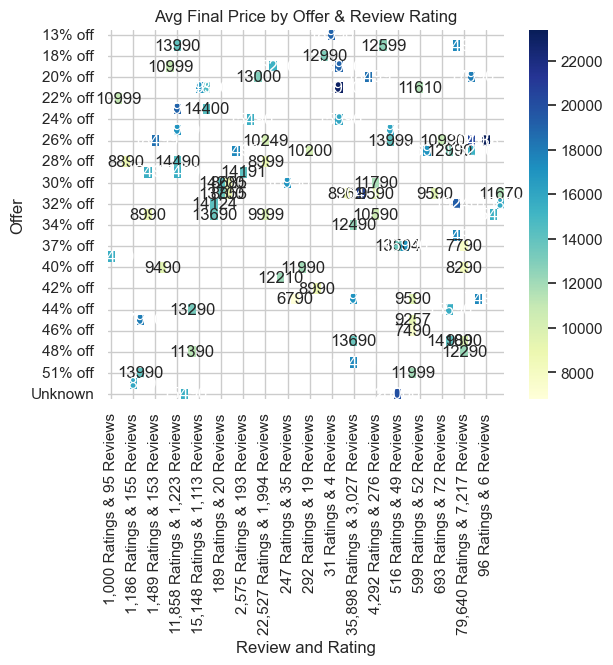

In [133]:
# Average Final Price by Offer and Review
grouped = df.groupby(['Offer', 'Review and Rating'])['Final Price After Discount'].mean().unstack()
print(grouped)

# Heatmap
sns.heatmap(grouped, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Avg Final Price by Offer & Review Rating')
plt.show()


- Pairplot highlights that while most variables show weak direct relationships, there are clusters indicating subgroups (e.g., budget-friendly vs premium machines).

- Heatmaps from grouped analysis (Offer vs Review) show pricing trends tied to marketing offers and customer ratings.

# Final Conclusion
- The dataset reveals meaningful insights about washing machine products, such as:

    - Mid-weight machines (~7 kg) dominate the market.

    - High ratings are common, suggesting general customer satisfaction.

    - Pricing strategy is influenced by product features (like weight and speed), and marketing offers.

    - Offers can be strategically aligned with product ratings and types to enhance sales.